In [2]:
# !uv pip install yfinance

In [41]:
import yfinance as yf
from datetime import datetime

def download_stock_data(ticker_symbol, start_date='2015-01-01', end_date='2025-01-01'):
    print(f"Downloading data for {ticker_symbol}...")
    
    # Fetch the data
    # interval options: '1d', '1wk', '1mo', '1m', etc.
    data = yf.download(ticker_symbol, start=start_date, end=end_date)
    
    if not data.empty:
        # Display the first few rows
        print(data.head())
        
        # Save to CSV
        filename = f"{ticker_symbol}_data.csv"
        data.to_csv(filename)
        print(f"Successfully saved to {filename}")
    else:
        print("No data found for the given parameters.")
    return data

# Example Usage
if __name__ == "__main__":
    ticker = "NVDA"
    start = "2024-01-01"
    end = datetime.now().strftime('%Y-%m-%d') # Current date
    
    download_stock_data(ticker, start, end)

/home/charilaos/Workspace/generative_music/.venv/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           NVDA       NVDA       NVDA       NVDA       NVDA
Date                                                             
2024-01-02  48.141174  49.267546  47.568495  49.216575  411254000
2024-01-03  47.542511  48.157166  47.293649  47.458558  320896000
2024-01-04  47.971275  48.472995  47.481546  47.740401  306535000
2024-01-05  49.069664  49.519414  48.279104  48.435019  415039000
2024-01-08  52.223907  52.245898  49.451454  49.484436  642510000
Successfully saved to NVDA_data.csv


In [ ]:
etfs = ['VTV','VUG']
vtv = download_stock_data('VTV')
vug = download_stock_data('VUG')

/home/charilaos/Workspace/generative_music/.venv/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open   Volume
Ticker            VTV        VTV        VTV        VTV      VTV
Date                                                           
2015-01-02  63.918415  64.304145  63.509990  64.220953  1549200
2015-01-05  62.738503  63.615861  62.609926  63.600731  1427700
2015-01-06  62.186390  63.056184  61.883852  62.889788  1303900
2015-01-07  62.882225  62.995677  62.443546  62.791462  1463700
2015-01-08  64.039406  64.107480  63.419206  63.419206   799100
Successfully saved to VTV_data.csv


In [56]:
vtv.to_pickle('VTV_data')

In [ ]:

import pandas as pd
vtv = pd.read_pickle('VTV_data')
window = 30

v = (vtv['Close'] - vtv['Close'].rolling(window=window, min_periods=1).mean())
vs = v.rolling(window = window).std()
vs_norm = vs.abs().quantile(.95)
vsignal = (v/vs)
vsignal 

Ticker,VTV
Date,
2015-01-02,NaN
2015-01-05,NaN
2015-01-06,NaN
2015-01-07,NaN
2015-01-08,NaN
...,...
2024-12-24,-1.056070
2024-12-26,-0.914740
2024-12-27,-1.104968


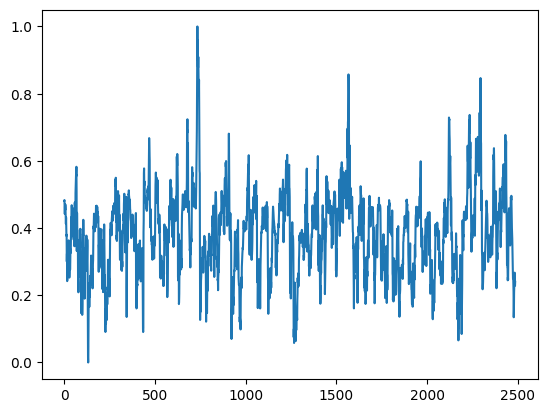

In [ ]:

import matplotlib.pyplot as pplot
pplot.plot(vsig)

<Axes: xlabel='Date'>

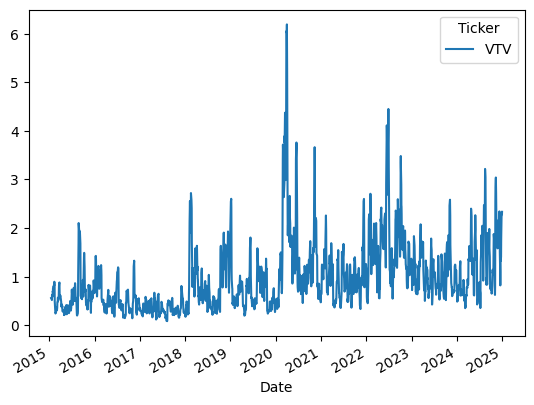

In [26]:
v.rolling(window=10).std().plot()

<Axes: xlabel='Date'>

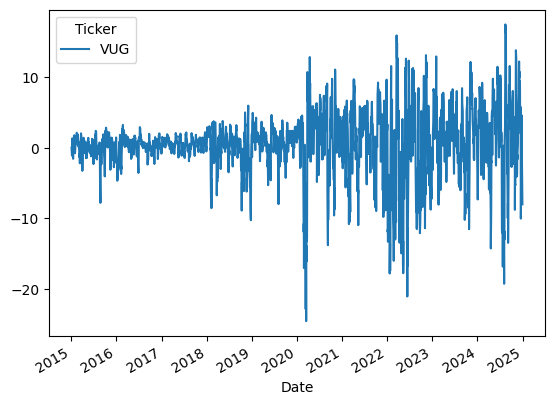

In [ ]:

v2 = (vug['Close'] - vug['Close'].rolling(window=10, min_periods=1).mean())
v2.plot()

In [ ]:
!uv pip install matplotlib

Using Python 3.12.3 environment at: /home/charilaos/Workspace/generative_music/.venv
Resolved 11 packages in 50ms                                         
⠹ Preparing packages... (0/1)                                                   
⠹ Preparing packages... (0/1)-------------------     0 B/119.90 KiB          
⠹ Preparing packages... (0/1)------------------- 14.88 KiB/119.90 KiB        
⠹ Preparing packages... (0/1)------------------- 30.88 KiB/119.90 KiB        
⠹ Preparing packages... (0/1)------------------- 46.88 KiB/119.90 KiB        
⠹ Preparing packages... (0/1)--------------- 62.88 KiB/119.90 KiB        
⠹ Preparing packages... (0/1)----------- 78.88 KiB/119.90 KiB        
⠹ Preparing packages... (0/1)---------- 94.88 KiB/119.90 KiB        
⠹ Preparing packages... (0/1)---------- 110.88 KiB/119.90 KiB       
⠹ Preparing packages... (0/1)---------- 119.90 KiB/119.90 KiB       
Prepared 1 package in 227ms                                                       
Installed 7 packag